* Amghar Rylan

# Mouvement rétrograde de Mars



![2014-2016-mars-retrograde-earth-night-sky-samples.jpg](./2014-2016-mars-retrograde-earth-night-sky-samples.jpg)

*image from https://mars.nasa.gov/all-about-mars/night-sky/retrograde/*

Tous les deux ans, si l'on regarde la position de Mars depuis la Terre par rapport à la voûte céleste, la planète rouge semble faire un bref demi-tour, avant de repartir dans le même sens. Ce mouvement rétrograde est observé depuis l'antiquité.

Le but de ce mini-projet est de construire un modèle reproduisant ce phénomène.

## À la maison

Rappelez les équations du mouvement $X(t),Y(t)$ pour un mouvement circulaire uniforme de rayon $R$, de période $T$ et de phase à l'origine $\phi$. 

Dans quelle direction (quel angle par rapport à la direction de l'axe $X$) pointe l'objet à la date $t=0$ ?

## Avec les paramètres énoncés précedemment, on obtient ces deux équations : 

$X(t)= R\cos(\phi)$

$Y(t)= R\sin(\phi)$

Pour t=0, l'objet pointe vers la direction de l'axe X

## Données

Le fichier DataMars.csv contient les coordonnées (longitude et latitude) de la position de Mars par rapport au centre de la Terre en fonction de la date entre 2015 et 2017. Notons que la latitude est définie ici par rapport au plan de l'écliptique. 

Le centre de la boucle peut s'observer à la date du 25 mai 2016, à la longitude de 240.5°.



>**NOTE**  
>Pour lire fichier csv, on peut utiliser la fonction `read_csv` du module Pandas, en utilisant l'option `comment = '#'`


*(DataMars.csv a été construit à partir des données de http://vo.imcce.fr/webservices/miriade/?forms)*


## Modèle

Vous allez utiliser un modèle bidimensionnel du mouvement de la Terre et de Mars autour du Soleil. On considérera le mouvement des deux planètes comme circulaire uniforme et contenu dans le plan de l'écliptique.

![solar.png](solar.png)

Ce modèle vous permettra de calculer la longitude de Mars vue depuis la Terre (i.e. l'angle $\phi_{app}$ dans le réferentiel géocentrique) en fonction du temps.

>**NOTE**  
>La fonction `numpy.arctan(y / x)` donnant un résultat entre $-\frac{\pi}{2}$ et $\frac{\pi}{2}$, nous vous conseillons de lui préférer la fonction `numpy.arctan2(y, x)` qui donne un résultat entre $-\pi$ et $\pi$.

Vous pourrez ensuite comparer le modèle (longitude calculée) aux données astronomiques (longitude mesurée).

>**INDICE**  
>Le mouvement rétrograde apparent s'observe quand, dans le réferentiel héliocentrique, la Terre "dépasse" Mars. Au "milieu" du mouvement rétrograde la Terre et Mars sont donc dans la même direction par rapport au Soleil (Soleil, Terre et Mars sont alignés). En choisissant judiciseusement la date $t=0$ et la phase à l'origine pour les deux planètes, on peut faire coïncider le modèle aux données à cet instant.


### Grandeurs utiles :

Rayon de l'orbite de la Terre : 1 UA  
Période de révolution de la Terre : 365.256 jours  
Rayon de l'orbite de Mars : 1.52371 UA  
Période de révolution de Mars : 686.885 jours


## Méthodes

Vous allez utiliser une représentation graphique pour illustrer votre modèle. Pour cela, il faut représenter sur un graphique à la fois les données et le modèle. Vous prendrez un soin particulier pour que le graphique soit lisible et compréhensible.

Voici un exemple de représentation graphique :

![graph.png](./graph.png)

# Création du modèle

On commence par définir nos constantes.
Les longueurs sont en mètres, les temps en secondes

In [2]:
Rt = 1.5e11                               #Rayon orbital de la Terre
Rm = 2.3e11                               #Rayon orbital de Mars
Tt = 365*24*3600                          #Période de révolution de la Terre
Tm = 687*24*3600                          #Période de révolution de Mars

In [3]:
# On définit notre variable t qui correspond au temps
import numpy as np
t= np.linspace(0, Tt, 365)

In [4]:
times = np.linspace(0, Tt, 365)
for time in times :
    print(time)

0.0
86637.36263736263
173274.72527472526
259912.0879120879
346549.4505494505
433186.81318681315
519824.1758241758
606461.5384615384
693098.901098901
779736.2637362637
866373.6263736263
953010.989010989
1039648.3516483516
1126285.7142857143
1212923.0769230768
1299560.4395604394
1386197.802197802
1472835.1648351648
1559472.5274725275
1646109.89010989
1732747.2527472526
1819384.6153846153
1906021.978021978
1992659.3406593406
2079296.7032967033
2165934.0659340657
2252571.4285714286
2339208.791208791
2425846.1538461535
2512483.5164835164
2599120.879120879
2685758.241758242
2772395.604395604
2859032.9670329667
2945670.3296703296
3032307.692307692
3118945.054945055
3205582.4175824174
3292219.78021978
3378857.1428571427
3465494.505494505
3552131.868131868
3638769.2307692305
3725406.593406593
3812043.956043956
3898681.3186813183
3985318.681318681
4071956.0439560437
4158593.4065934066
4245230.769230769
4331868.131868131
4418505.494505494
4505142.857142857
4591780.21978022
4678417.582417582
47650

In [5]:
# On reprend nos équations du mouvement avec phi=2pi/T
xt= Rt*np.cos((2*np.pi*t)/Tt)            #équations pour la Terre
yt= Rt*np.sin((2*np.pi*t)/Tt)

xm= Rm*np.cos((2*np.pi*t)/Tm)            ##équations pour Mars
ym= Rm*np.sin((2*np.pi*t)/Tm)

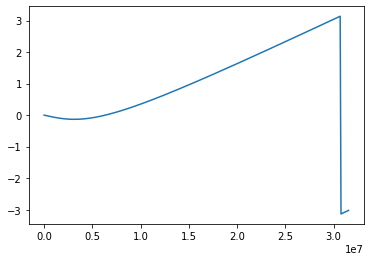

In [6]:
# On définit notre angle phi app
import matplotlib.pyplot as plt
phiapp= np.arctan2((ym-yt), (xm-xt))
plt.plot(t, phiapp)

## Compte-rendu

Vous rendrez un compte-rendu sous la forme d’un Jupyter Notebook (et d’une partie rédigée à la main si vous le souhaitez). Vous apporterez un soin particulier à la rédaction, à l’explication de la résolution du problème, et à l’explication du script (code commenté). Pour cela, vous ferez différentes sections et vous utiliserez des cellules de texte dans le notebook. Voici un exemple de cellule de texte :
```
# Section 1
## Sous-section 1
Du texte
- une liste

une formule latex $k=2$
```

Vous trouverez un formulaire détaillé du formatage des cellules de texte sur le Moodle, [ou bien ici](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#lines).

Vous rendrez votre compte-rendu dans l’activité devoir correspondante de Moodle.